# 1. Introduction

Name : Muhammad Erico Ricardo

Batch : FTDS-BSD-007

Link Huggingface : https://huggingface.co/spaces/EricoR/Image_transportation_classification


**Kasus Studi: Optimasi Rute Pengiriman dengan Klasifikasi Gambar**

Perusahaan e-commerce saat ini menghadapi tantangan dalam mengirimkan produk secara efisien dan hemat biaya kepada banyak pelanggan. Rute pengiriman yang tidak optimal dapat menyebabkan peningkatan waktu pengiriman, biaya bahan bakar yang lebih tinggi, serta penurunan kepuasan pelanggan.

Model klasifikasi gambar berbasis kendaraan dapat menjadi solusi untuk meningkatkan efisiensi pengiriman. Dengan mengintegrasikan model ini ke dalam sistem optimasi rute, kita dapat:

* **Mengidentifikasi Jenis Kendaraan:** Kamera yang dipasang pada kendaraan pengiriman dapat menangkap gambar kendaraan yang lalu lalang. Model kemudian akan menganalisis gambar tersebut untuk mengidentifikasi jenis kendaraan (misalnya, van, truk, motor).
* **Merencanakan Rute yang Optimal:** Berdasarkan jenis kendaraan yang teridentifikasi, sistem akan memilih rute yang paling sesuai. Misalnya, kendaraan yang lebih kecil seperti motor akan lebih efisien untuk melewati jalan sempit atau daerah yang padat.
* **Menyesuaikan Rute secara Dinamis:** Jika sistem mendeteksi perubahan kondisi lalu lintas atau penutupan jalan, sistem dapat secara otomatis menyesuaikan rute untuk meminimalkan penundaan dan memastikan pengiriman tepat waktu.
* **Mengestimasi Waktu Pengiriman:** Dengan mempertimbangkan jenis kendaraan dan kondisi rute, sistem dapat memberikan perkiraan waktu pengiriman yang lebih akurat kepada pelanggan, sehingga meningkatkan pengalaman pelanggan.

**Manfaat:**

* **Pengiriman Lebih Cepat:** Rute yang dioptimalkan akan menghasilkan pengiriman yang lebih cepat dan meningkatkan kepuasan pelanggan.
* **Biaya Bahan Bakar Lebih Rendah:** Rute yang efisien mengurangi jarak tempuh, sehingga mengurangi konsumsi bahan bakar dan biaya operasional.
* **Alokasi Sumber Daya yang Lebih Baik:** Dengan memahami jenis kendaraan yang digunakan untuk pengiriman, perusahaan dapat mengalokasikan sumber daya secara lebih baik dan mengoptimalkan armada kendaraan.
* **Pengambilan Keputusan Berbasis Data:** Model ini menyediakan data yang berharga untuk menganalisis kinerja pengiriman dan mengidentifikasi area yang perlu ditingkatkan.

**Peran Klasifikasi Gambar**

Kemampuan model untuk mengklasifikasi gambar sangat penting dalam optimasi rute pengiriman. Dengan mengidentifikasi jenis kendaraan secara akurat, model ini memungkinkan sistem untuk:

* **Menyesuaikan Rute:** Memilih rute yang paling sesuai dengan karakteristik kendaraan.
* **Mengestimasi Waktu Tempuh:** Memberikan perkiraan waktu tempuh yang lebih akurat.
* **Meminimalkan Biaya Operasional:** Memilih rute yang paling hemat biaya.
* **Mengambil Keputusan secara Dinamis:** Menyesuaikan rute berdasarkan kondisi lalu lintas yang berubah.
* **Menganalisis Kinerja Armada:** Mengidentifikasi kendaraan yang paling efisien dan memprediksi kebutuhan perawatan.

**Contoh Kasus Penggunaan**

Perusahaan kurir dan layanan antar jemput makanan adalah contoh nyata dari perusahaan yang dapat memanfaatkan teknologi ini. Dengan menggunakan model klasifikasi gambar, mereka dapat mengoptimalkan rute pengiriman, mengurangi biaya, dan meningkatkan kepuasan pelanggan.

**Kesimpulan**

Model klasifikasi gambar memainkan peran yang sangat penting dalam optimasi rute pengiriman. Dengan kemampuan untuk mengidentifikasi jenis kendaraan secara akurat, model ini memungkinkan sistem untuk mengambil keputusan yang lebih baik, meningkatkan efisiensi, dan memberikan layanan yang lebih baik kepada pelanggan.


**Urgensi**

Kenapa itu optimasi rute pengiriman penting? karena dengan melakukan optimasi rute pengiriman, kita dapat mendapatkan profit lebih atau minimal kita dapat lebih efisien dalam melakukan pengiriman. Kasus tersebut juga pernah dilakukan oleh penelitian di india dengan jurnal "Road traffic optimization using image processing and clustering algorithms" walau dengan teknik yang berbeda.

Link jurnal : "https://www.sciencedirect.com/science/article/abs/pii/S0965997823000522"

# 2. Import Libraries

Melakukan import library yang dibutuhkan.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import glob
import cv2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import BatchNormalization, GlobalAveragePooling2D




# 3. Data Loading


In [2]:
# Mengambil data dari folder
Bike = glob.glob('Vehicles\Bikes\*.jpg')

Motorcycles = glob.glob('Vehicles\Motorcycles\*.jpg')

Plane = glob.glob('Vehicles/Planes/*.jpg')

Cars = glob.glob('Vehicles/Cars/*.jpg')

Ship = glob.glob('Vehicles/Ships/*.jpg')

Bajaj = glob.glob('Vehicles/Auto Rickshaws/*.jpg')

Trains = glob.glob('Vehicles/Trains/*.jpg')


In [3]:
# Membuat fungsi untuk melakukan labeling untuk setiap kelas.
def labeling(image_list, label):
  df = pd.DataFrame()
  df['image'] = image_list
  df['label'] = label
  return df

# Melakukan labelin di setiap kelas
Cars = labeling(Cars, 'Cars')
Bajaj = labeling(Bajaj, 'Auto Rickshaws/ Bajaj')
Bikes = labeling(Bike, 'Bikes')
Motorcycles = labeling(Motorcycles, 'Motorcycles')
Planes = labeling(Plane, 'Planes')
Ship = labeling(Ship, 'Ships')
Trains = labeling(Trains, 'Trains')

Melakukan pemisahan antara data train, validation, dan test untuk setiap label.

In [4]:
# Split Cars data
Cars_train, Cars_temp = train_test_split(Cars, test_size=0.2, random_state=42)
Cars_val, Cars_test = train_test_split(Cars_temp, test_size=0.5, random_state=42)

# Split Bajaj data
Bajaj_train, Bajaj_temp = train_test_split(Bajaj, test_size=0.2, random_state=42)
Bajaj_val, Bajaj_test = train_test_split(Bajaj_temp, test_size=0.5, random_state=42)

# Split Bikes data
Bikes_train, Bikes_temp = train_test_split(Bikes, test_size=0.2, random_state=42)
Bikes_val, Bikes_test = train_test_split(Bikes_temp, test_size=0.5, random_state=42)

# Split Motorcycles data
Motorcycles_train, Motorcycles_temp = train_test_split(Motorcycles, test_size=0.2, random_state=42)
Motorcycles_val, Motorcycles_test = train_test_split(Motorcycles_temp, test_size=0.5, random_state=42)

# Split Planes data
Planes_train, Planes_temp = train_test_split(Planes, test_size=0.2, random_state=42)
Planes_val, Planes_test = train_test_split(Planes_temp, test_size=0.5, random_state=42)

# Split Ship data
Ship_train, Ship_temp = train_test_split(Ship, test_size=0.2, random_state=42)
Ship_val, Ship_test = train_test_split(Ship_temp, test_size=0.5, random_state=42)

# Split Trains data
Trains_train, Trains_temp = train_test_split(Trains, test_size=0.2, random_state=42)
Trains_val, Trains_test = train_test_split(Trains_temp, test_size=0.5, random_state=42)


Menggabungkan semua data train, validation, dan test dari berbagai label.

In [5]:
Train_data = pd.concat([Cars_train, Bajaj_train, Bikes_train, Motorcycles_train, Planes_train, Ship_train, Trains_train], axis=0)
Test_data = pd.concat([Cars_test, Bajaj_test, Bikes_test, Motorcycles_test, Planes_test, Ship_test, Trains_test], axis=0)
Val_data = pd.concat([Cars_val, Bajaj_val, Bikes_val, Motorcycles_val, Planes_val, Ship_val, Trains_val], axis=0)

# 4. Exploratory Data Analysis (EDA)

Pada EDA ini, kita akan melihat karakteristik dari mayoritas data pada masing-masing kelas.

In [6]:
# Membuat fungsi untuk menampilkan 10 gambar dari suatu kelas
def show_image(image_list):
  plt.figure(figsize=(15,15))
  for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(plt.imread(image_list[i]))
    plt.axis('off')
  plt.show()


### Menampilkan gambar dari label mobil 

Show Cars image in train cars data


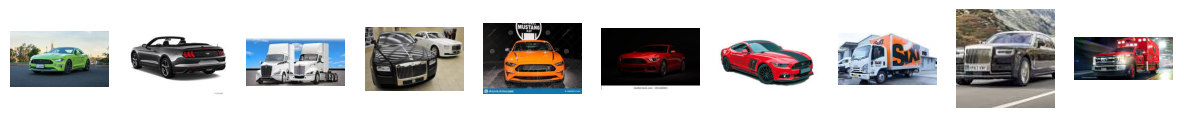

In [7]:
print("Show Cars image in train cars data")
show_image(Cars_train['image'].tolist())

Berdasarkan gambar diatas, karakteristik mobil yang digunakan untuk model ini adalah :
1. Memiliki roda 2 hingga 4.
2. Memiliki pintu.
3. Memiliki desain yang berbeda-beda, cenderung body.

### Menampilkan gambar dari label bajaj

Show Auto Rickshaws/ Bajaj image in train Auto Rickshaws/ Bajaj data


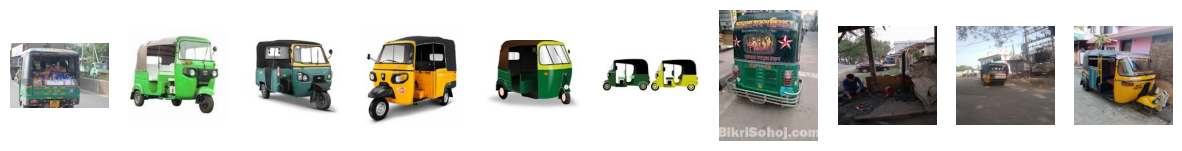

In [8]:
print("Show Auto Rickshaws/ Bajaj image in train Auto Rickshaws/ Bajaj data")
show_image(Bajaj_train['image'].tolist())

Berdasarkan gambar di atas, karakteristik bajaj yang digunakan untuk model ini yang paling jelas adalah:
1. memiliki 2-3 roda
2. memiliki ukuran yang kecil dibandingkan dengan mobil
3. tidak memiliki pintu.
4. Memiliki desain yang cenderung sama.

### Menampilkan gambar dari label sepeda.

Show Bikes image in train Bikes data


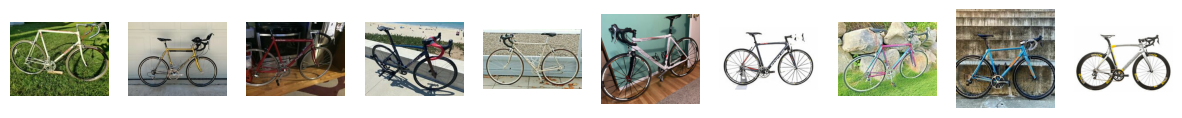

In [9]:
print("Show Bikes image in train Bikes data")
show_image(Bikes_train['image'].tolist())

Berdasarkan gambar di atas, karakterisitk sepeda untuk model ini adalah:
1. Memiliki 2 roda.
2. Memiliki Roda yang lebar.
3. Memiliki rangka yang terlihat.
4. Memiliki desain yang cenderung sama.

### Menampilkan gambar dari label motor.

Show Motorcycles image in train Motorcycles data


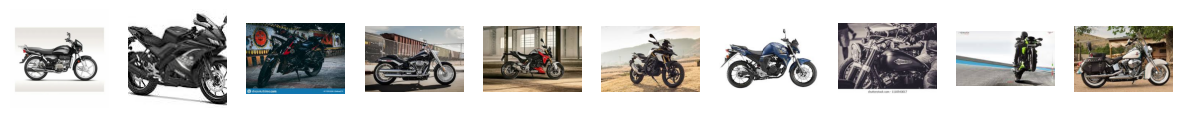

In [10]:
print("Show Motorcycles image in train Motorcycles data")
show_image(Motorcycles_train['image'].tolist())

Berdasarkan gambar di atas, karakteristik motor untuk model ini adalah:
1. Memiliki 2 roda.
2. Memiliki roda yang tebal namun tidak lebar seperti sepeda.
3. Memiliki body yang menutupi rangka.
4. Memiliki desain yang berbeda-beda tergantung body.

### Menampilkan gambar dari label pesawat.

Show Planes image in train Planes data


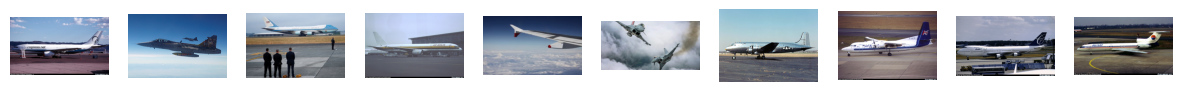

In [11]:
print("Show Planes image in train Planes data")
show_image(Planes_train['image'].tolist())

Berdasarkan gambar di atas, karakteristik pesawat untuk model ini adalah:
1. Terlihat memiliki sayap yang lebar.
2. Memiliki ukuran besar.
3. Untuk beberapa pesawat memiliki kecenderungan posisi sayap yang sama.

### Menampilkan gambar dari label kapal

Show Ships image in train Ships data


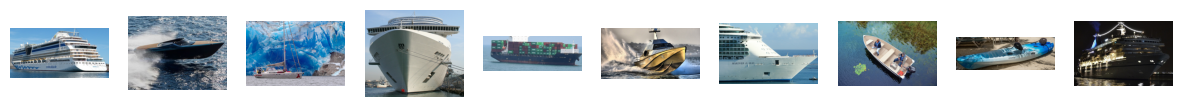

In [12]:
print("Show Ships image in train Ships data")
show_image(Ship_train['image'].tolist())

Berdasarkan gambar di atas, karakter perahu untuk model ini adalah:
1. Memiliki lambung yang terlihat
2. Kebanyakan memiliki background air.

### Menampilkan gambar dari label kereta.

Show Trains image in train Trains data


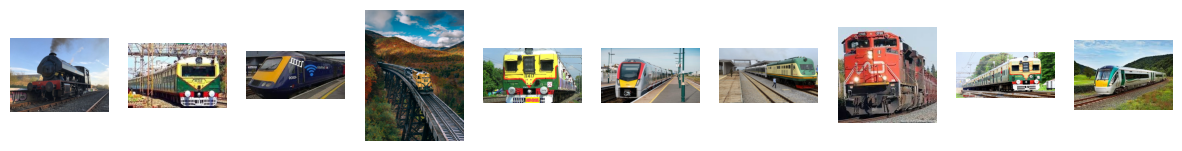

In [13]:
print("Show Trains image in train Trains data")
show_image(Trains_train['image'].tolist())

Berdasarkan gambar di atas, karakter kereta adalah:
1. Memiliki bentuk yang pipih dan memanjang
2. memiliki background daratan.

# 5. Feature Engineering

## Feature Engineering ke gambar.

Melakukan rekayasa fitur terhadap gambar, untuk gambar saya melakukan rekayasa fitu :
1. Melakukan resize gambar menjadi ukuran 64x64,diperlukan karena model CNN yang saya gunakan memiliki input yang berukuran tetap. Ukuran ini juga memungkinkan kita mengurangi ukuran gambar secara signifikan, yang dapat meningkatkan kecepatan proses training.
2. Melakukan normalisasi terhadap gambar. Normalisasi adalah proses yang memungkinkan kita menormalisasi nilai-nilai pixel dalam gambar ke dalam rentang tertentu, misalnya, [0, 1]. Ini adalah langkah yang diperlukan karena model deep learning bekerja lebih baik dengan nilai-nilai yang ternormalisasi.
3. Mengubah warna gambar menjadi rgb, Karena gambar yang saya gunakan adalah gambar berwarna, saya mengubahnya menjadi warna RGB. RGB adalah model warna yang memiliki tiga kanal: merah (Red), hijau (Green), dan biru (Blue). Model warna ini adalah model warna yang paling umum digunakan dalam gambar berwarna.

In [14]:
def feature_engineering(df):
  # Buat daftar kosong untuk menyimpan gambar yang telah diproses
  images = []
  # Iterasi baris pada DataFrame
  for index, row in df.iterrows():
    # Akses path gambar dari baris
    path_gambar = row['image']
    # Pastikan path_gambar adalah string
    if not isinstance(path_gambar, str):
      path_gambar = str(path_gambar)
    # Baca gambar menggunakan cv2.imread
    img = cv2.imread(path_gambar)
    # Periksa apakah gambar berhasil dimuat
    if img is not None:
      # Ubah ukuran gambar menjadi 64x64
      img = cv2.resize(img, (64, 64))
      # Ubah kedalaman gambar ke CV_8U sebelum normalisasi
      img = img.astype(np.uint8)
      # Normalisasi data gambar ke rentang [0, 1]
      img = img / 255.0
      # Ubah gambar kembali ke CV_8U setelah normalisasi
      img = (img * 255).astype(np.uint8)
      # Periksa jumlah kanal pada gambar
      if len(img.shape) == 2:
        # Ubah gambar grayscale ke RGB
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
      else:
        # Ubah gambar BGR ke RGB
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      # Tambahkan gambar yang telah diproses ke daftar
      images.append(img)
    else:
      # Cetak pesan kesalahan jika gagal memuat gambar
      print(f"Gagal memuat gambar: {path_gambar}")
      # Tambahkan gambar kosong jika gagal memuat gambar
      images.append(np.zeros((224, 224), dtype=np.uint8))
  # Perbarui kolom 'image' dengan daftar gambar yang telah diproses
  df['image'] = images
  # Kembalikan DataFrame yang telah diproses
  return df

In [15]:
# Melakukan feature_engineering pada setiap gambar pada data train, validation, dan test.
Train_data = feature_engineering(Train_data)
Val_data = feature_engineering(Val_data)
Test_data = feature_engineering(Test_data)

Melihat hasil dari feature engineering

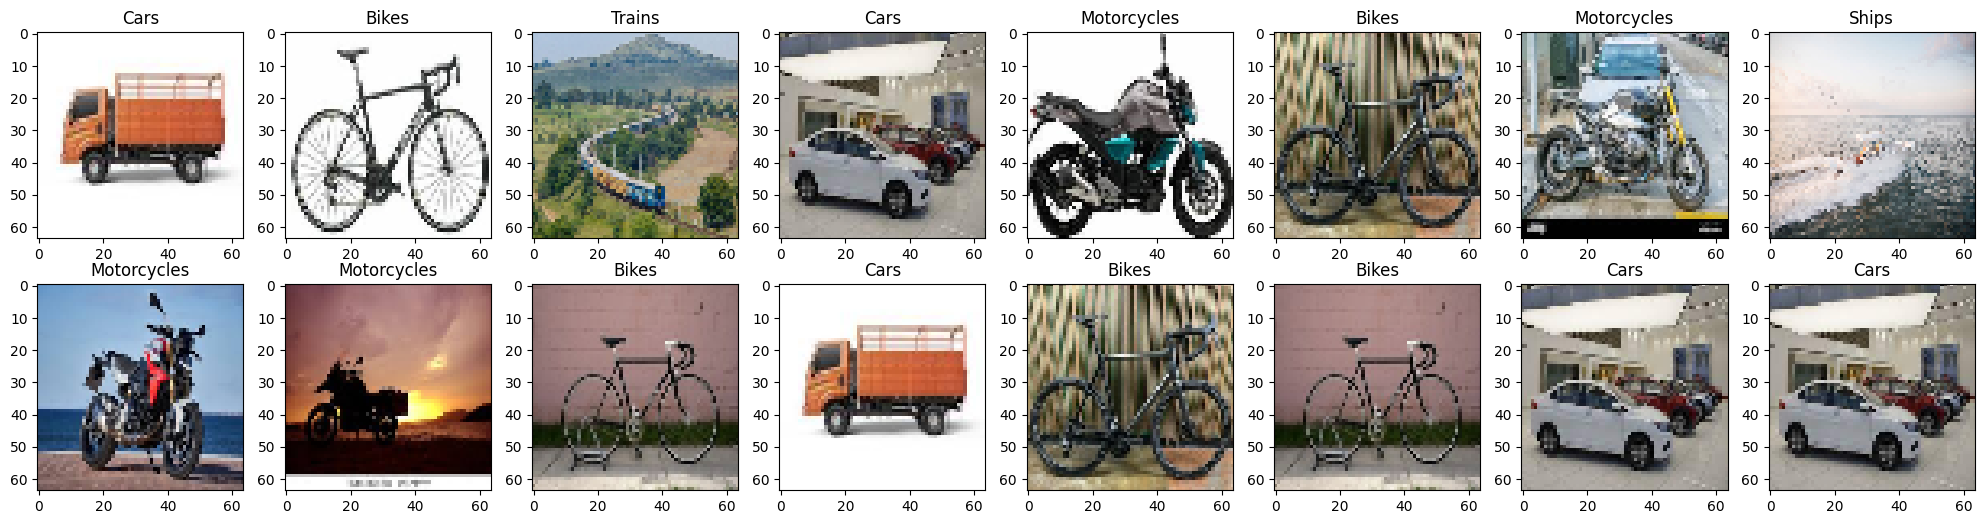

In [16]:
fig,ax = plt.subplots(nrows=2,ncols=8,figsize=(25,6))
n = 0
sample = Train_data.sample(n=16) # Mengambil 16 gambar random dari train
images = sample['image'].values # Mengambil gambar
labels = sample['label'].values # Mengambil label

idx = np.random.randint(len(images), size=16)
for i in range(2):
  for j in range(8):
    img = images[idx[n]]
    ax[i][j].imshow(img)
    # Mengambil nama kelas dari label gambar
    class_name = labels[idx[n]]
    ax[i][j].set_title(class_name) # membuat nama kelas tersebut menjadi judul gambar
    n+=1

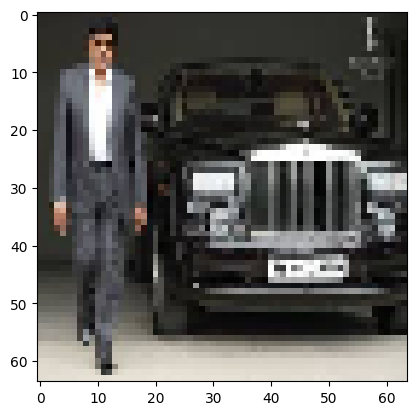

In [17]:
# Melihat salah satu contoh hasil pre processing lebih jelas dengan hanya menampilkan 1 gambar yang membuat foto lebih besar
plt.imshow(Test_data.iloc[20]['image']) 
plt.show() 

## Melakukan feature engineering pada label.

Saat feature engineering ini juga saya melakukan label encoder, karena model deep learning Anda memerlukan label yang berupa nilai numerik untuk dipelajari oleh model. Label encoder adalah sebuah alat yang membantu Anda mengubah label yang berupa string menjadi nilai numerik.

Dalam kasus ini, Anda memiliki 7 kelas yang berbeda, yaitu: Auto Rickshaws/ Bajaj, Bikes, Cars, Motorcycles, Planes, Ships, dan Trains. Label encoder akan mengubah label ini menjadi nilai numerik seperti berikut:

| Label Encode | Original Labels |
| --- | --- |
| 0 | Auto Rickshaws/ Bajaj |
| 1 | Bikes |
| 2 | Cars |
| 3 | Motorcycles |
| 4 | Planes |
| 5 | Ships |
| 6 | Trains |

In [18]:
# Encode label
le = LabelEncoder()
y_train_enc = le.fit_transform(Train_data['label']) 
# Fit encoder pada label pelatihan dan ubah label menjadi nilai numerik
y_val_enc = le.transform(Val_data['label']) 
# Gunakan encoder yang sama untuk mengubah label validasi menjadi nilai numerik
y_test_enc = le.transform(Test_data['label']) 
# Gunakan encoder yang sama untuk mengubah label tes menjadi nilai numerik

# Siapkan data
X_train = np.array(Train_data['image'].tolist())
y_train = to_categorical(y_train_enc) 
# Gunakan label yang telah diencode dan biarkan to_categorical menentukan jumlah kelas

X_val = np.array(Val_data['image'].tolist())
y_val = to_categorical(y_val_enc) 
# Gunakan label yang telah diencode dan biarkan to_categorical menentukan jumlah kelas

X_test = np.array(Test_data['image'].tolist())
y_test = to_categorical(y_test_enc) 
# Gunakan label yang telah diencode dan biarkan to_categorical menentukan jumlah kelas

In [19]:
# Melihat sebelum dan setelah encode
inverse_transform = le.inverse_transform(y_train_enc)

# Print the original labels
print("Label Encode:", np.unique(y_train_enc))
print("Original Labels:", np.unique(inverse_transform))

Label Encode: [0 1 2 3 4 5 6]
Original Labels: ['Auto Rickshaws/ Bajaj' 'Bikes' 'Cars' 'Motorcycles' 'Planes' 'Ships'
 'Trains']


# 6. ANN Training (Sequential API)

## Model Definition
**model Convolutional Neural Network (CNN) sederhana** yang dirancang untuk tugas klasifikasi gambar. CNN adalah jenis arsitektur deep learning yang sangat efektif untuk memproses data gambar. Model ini dibangun menggunakan library TensorFlow Keras, sebuah API tingkat tinggi yang memudahkan dalam membangun dan melatih model deep learning.

**Alasan Menggunakan CNN**

* **Ekstraksi Fitur Otomatis:** CNN sangat baik dalam mengekstraksi fitur-fitur penting dari gambar secara otomatis. Lapisan konvolusional (Conv2D) akan belajar untuk mendeteksi pola-pola dasar seperti tepi, sudut, dan tekstur dalam gambar.
* **Invariance terhadap Translasi:** CNN memiliki sifat invarian terhadap translasi, artinya model dapat mengenali objek meskipun posisinya sedikit bergeser dalam gambar.
* **Hierarki Fitur:** Lapisan-lapisan dalam CNN membentuk hierarki fitur, di mana lapisan awal mendeteksi fitur sederhana dan lapisan akhir mendeteksi fitur yang lebih kompleks.


**Matrix Yang Digunakan** Matrix yang digunakan adalah akurasi, akurasi digunakan untuk melihat dan membandingkan hasil dari deep learning.

**Alasan Menggunakan Akurasi** Alasan akurasi digunakan untuk evaluasi adalah karena model ini merupakan klasifikasi multiclass, dan memiliki persebaran kelas yang mirip, yaitu di 800 gambar perkelas.


In [20]:
# Membersihkan GPU memory
tf.keras.backend.clear_session()

saya akan menggunakan seed untuk menjaga model agar menghasilkan hasil yang tidak terlalu jauh bahkan sama setiap kali dijalankan.

In [21]:
seed = 42  # pilih seed yang diinginkan
np.random.seed(seed)
tf.random.set_seed(seed)

In [22]:
# Membuat model sequential, pada model karena merupakan model gambar maka saya menggunakan Conv2d, BatchNormalization, dan pooling2D.
model = Sequential()

# Input layer
model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(64, 64, 3),kernel_initializer= tf.keras.initializers.GlorotUniform(seed=seed)))

# Hidden Layer
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(2, 2))

model.add(tf.keras.layers.Conv2D(128, (3,3), activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(2, 2))

model.add(tf.keras.layers.Conv2D(256, (3,3), activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(2, 2))

model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dense(256, activation='relu',kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed)))
model.add(tf.keras.layers.BatchNormalization())

# Ouput Layer
model.add(tf.keras.layers.Dense(len(np.unique(y_train_enc)), activation='softmax'))


Penjelasan
| Poin | Terjemahan |
|---|---|
| Input Layer | Lapisan pertama yang menerima data input berupa gambar dengan ukuran 64x64 piksel dan 3 saluran warna (RGB). Lapisan ini menggunakan 64 filter berukuran 3x3 dengan fungsi aktivasi ReLU untuk mengekstrak fitur-fitur dasar dari gambar. |
| Hidden Layer 1 | Lapisan ini terdiri dari normalisasi batch (BatchNormalization) dan pooling maksimum (MaxPooling2D). Normalisasi batch membantu menjaga stabilitas pelatihan, sementara pooling maksimum mengurangi dimensi spasial tanpa kehilangan informasi penting. |
| Hidden Layer 2 (Conv2D x2) | Dua lapisan ini menggunakan operasi konvolusi untuk mengekstrak fitur-fitur yang lebih kompleks dari gambar. Lapisan kedua menggunakan 128 filter, sedangkan lapisan ketiga menggunakan 256 filter. Kedua lapisan ini juga menggunakan fungsi aktivasi ReLU. |
| Hidden Layer 3 (BatchNormalization x2) | Sama seperti sebelumnya, lapisan-lapisan ini digunakan untuk menjaga stabilitas pelatihan dengan menormalkan output dari lapisan konvolusi sebelumnya. |
| Hidden Layer 4 (MaxPooling2D x2) | Lapisan-lapisan ini mengurangi dimensi spasial dari fitur-fitur yang telah diekstrak. |
| GlobalAveragePooling2D Layer | Lapisan ini mengubah fitur-fitur spasial menjadi vektor tunggal dengan menghitung rata-rata nilai setiap fitur di seluruh gambar. |
| Hidden Layer 5 (Dense) | Lapisan ini menghubungkan semua neuron dalam lapisan sebelumnya dengan setiap neuron dalam lapisan ini. Lapisan ini digunakan untuk menggabungkan fitur-fitur yang telah diekstrak menjadi representasi yang lebih abstrak. |
| BatchNormalization Layer 6 | Lapisan ini menormalkan output dari lapisan fully connected sebelumnya untuk meningkatkan stabilitas pelatihan. |
| Output Layer | Lapisan terakhir yang menghasilkan prediksi kelas berdasarkan fitur-fitur yang telah diekstrak. Lapisan ini menggunakan fungsi aktivasi softmax untuk menghasilkan probabilitas untuk setiap kelas. |


In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 62, 62, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 128)       73856     
                                                                 
 batch_normalization_1 (Batc  (None, 29, 29, 128)      512       
 hNormalization)                                                 
                                                        

## Model Training

Melakukan compile dan training pada model

Saat model compile saya menggunakan adam karena adam adalah salah satu optimizer paling populer yang digunakan untuk melakukan deep learning, selain itu ada beberapa keuntungan menggunakan ada :

- Kecepatan Konvergensi: Optimizer Adam memiliki kecepatan konvergensi yang cukup cepat, yang berarti model dapat belajar cepat dan mendekati nilai minimum loss.
- Keamanan: Optimizer Adam memiliki keamanan yang baik dalam menangani masalah yang berkaitan dengan gradient yang sangat kecil, seperti yang terjadi pada model deep learning.
- Adaptif: Optimizer Adam memiliki kemampuan adaptif yang dapat menyesuaikan learning rate secara dinamis, yang berarti model dapat belajar dengan lebih baik pada berbagai tingkat kesulitan.

In [24]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=30, batch_size=16, validation_data=(X_val, y_val), callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)])

Epoch 1/30
254/254 [==============================] - 10s 15ms/step - loss: 1.1516 - accuracy: 0.5979 - val_loss: 2.1043 - val_accuracy: 0.4545
Epoch 2/30
254/254 [==============================] - 3s 13ms/step - loss: 0.8008 - accuracy: 0.7160 - val_loss: 1.5365 - val_accuracy: 0.5296
Epoch 3/30
254/254 [==============================] - 3s 13ms/step - loss: 0.6615 - accuracy: 0.7706 - val_loss: 2.0562 - val_accuracy: 0.4941
Epoch 4/30
254/254 [==============================] - 3s 13ms/step - loss: 0.5308 - accuracy: 0.8160 - val_loss: 0.8753 - val_accuracy: 0.6917
Epoch 5/30
254/254 [==============================] - 3s 13ms/step - loss: 0.4415 - accuracy: 0.8449 - val_loss: 2.6339 - val_accuracy: 0.5494
Epoch 6/30
254/254 [==============================] - 3s 13ms/step - loss: 0.3976 - accuracy: 0.8617 - val_loss: 0.7088 - val_accuracy: 0.7727
Epoch 7/30
254/254 [==============================] - 3s 13ms/step - loss: 0.3380 - accuracy: 0.8812 - val_loss: 2.1577 - val_accuracy: 0.521

Karena setiap kali melakukan run all, model berubah-ubah. saya menyimpan salah satu model untuk dijadikan evaluasi yang tidak berubah-ubah setiap di run all.

In [25]:
# model.save("model_first.h5")

Melakukan load model yang sudah ada.

In [26]:
model = tf.keras.models.load_model('model_first.h5')

## Model Evaluation

Menampilkan grafik akurasi dan loss yang telah dihasilkan oleh model.

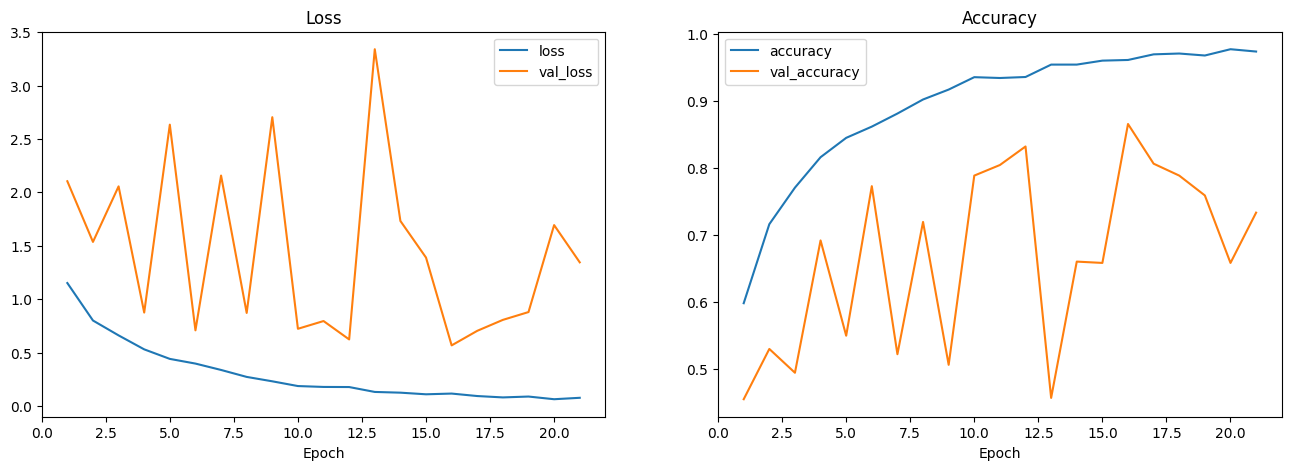

In [27]:
# Menentukan epoch berdasarkan epoch dari train model sebelumnya.
epoch = len(history.history['loss'])

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),history.history['loss'],label='loss')
ax[0].plot(range(1,epoch+1),history.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')

ax[1].plot(range(1,epoch+1),history.history['accuracy'],label='accuracy')
ax[1].plot(range(1,epoch+1),history.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')

plt.show()

Berdasarkan grafik diatas, kita dapat melihat bahwa model memiliki exploding gradient, oleh karena itu kita akan coba melakukan solusi kedepannya.

### Melakukan prediksi pada data train

In [28]:
y_train_pred = model.predict(X_train)
y_train_pred_class = np.argmax(y_train_pred,axis=1)
y_train_classes = np.argmax(y_train, axis=1)

print("Predicted Labels :", y_train_pred_class)
print("Actual Classes :", y_train_classes)

127/127 [==============================] - 1s 6ms/step
Predicted Labels : [2 2 2 ... 6 6 5]
Actual Classes : [2 2 2 ... 6 6 6]


### Melakukan predict pada validation

In [29]:
y_val_pred = model.predict(X_val)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_val_classes = np.argmax(y_val, axis=1)


print("Predicted labels:", y_val_pred_classes)
print("Actual labels:", y_val_classes)

16/16 [==============================] - 0s 15ms/step
Predicted labels: [2 2 2 2 2 2 2 2 2 5 2 2 2 2 2 2 2 5 2 6 2 2 4 2 2 2 2 2 2 2 2 2 2 5 2 2 2
 2 2 2 2 2 2 2 6 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 5 2 3 2 2
 3 2 2 3 2 2 2 0 0 0 2 0 0 0 2 0 0 2 3 0 5 5 0 0 0 0 2 2 2 5 0 0 2 0 0 0 0
 5 0 5 5 2 0 5 2 0 0 2 2 2 2 2 2 3 2 0 2 0 5 0 0 2 0 0 2 0 0 0 5 5 0 0 0 0
 5 0 0 2 0 2 0 1 1 1 1 3 1 1 3 1 1 1 1 1 2 1 1 1 5 5 1 1 1 1 3 1 2 5 1 1 1
 3 1 1 5 1 1 5 1 3 4 2 5 1 1 1 5 1 1 5 1 1 1 1 1 1 1 3 1 3 1 1 5 1 1 1 1 1
 1 1 5 1 1 1 2 1 1 1 3 5 1 3 3 2 3 5 2 3 3 3 3 6 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 5 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5 5 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 5 3 3 3 3 3 3 2 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 5 4 4 4 5 4 6
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 4 4 4 4 4 4 4 4 3 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 4 4 4 5 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 3 5 5
 5 5 5 5 5 5 5 5 3 5 5 5 5 5

### Melihat perbandingan akurasi pada Train dan Validation.

In [30]:
accuracy_train = accuracy_score(y_train_classes,y_train_pred_class)
accuracy = accuracy_score(y_val_classes, y_val_pred_classes)
print("Accuracy Train: ", accuracy_train)
print("Accuracy Val:", accuracy)

Accuracy Train:  0.8928130402568536
Accuracy Val: 0.7905138339920948


Berdasarkan hasil akurasi diatas, kita dapat melihat bahwa model overfit terhadap data train, memiliki selisih sebesar 10% terhadap data validation.

In [31]:
print("classification report pada train")
print(classification_report(y_train_classes,y_train_pred_class))
print("classification report pada val")
print(classification_report(y_val_classes, y_val_pred_classes))

classification report pada train
              precision    recall  f1-score   support

           0       1.00      0.62      0.77       607
           1       1.00      0.83      0.91       639
           2       0.81      0.99      0.89       631
           3       0.90      0.97      0.94       636
           4       0.97      0.95      0.96       618
           5       0.75      0.96      0.84       619
           6       0.98      0.93      0.96       299

    accuracy                           0.89      4049
   macro avg       0.92      0.89      0.89      4049
weighted avg       0.91      0.89      0.89      4049

classification report pada val
              precision    recall  f1-score   support

           0       0.98      0.53      0.68        76
           1       1.00      0.70      0.82        80
           2       0.67      0.86      0.76        79
           3       0.76      0.89      0.82        80
           4       0.97      0.91      0.94        77
           5  

Berdasarkan hasil dari model, kita dapat mengetahui bahwa model masih overfit dengan selisih sebesar 4%. oleh karena itu untuk improvement selanjutnya kita akan melakukan hal yang membuat model tidak terlalu overfit.

# 7. ANN Improvement (Sequential API)

## Model Definition
Dropout adalah teknik regularisasi yang umum digunakan dalam ANN untuk mencegah overfitting. Lapisan dropout secara acak "menjatuhkan" (menonaktifkan) sebagian neuron selama setiap pass forward dan backward dari pelatihan.

Transfer learning adalah sebuah teknik dalam machine learning yang memungkinkan model untuk menggunakan pengetahuan yang telah dipelajari dari tugas lain untuk meningkatkan kemampuan pada tugas baru. Dalam konteks deep learning, transfer learning memungkinkan model untuk menggunakan weight dan bias yang telah dipelajari dari dataset lain untuk meningkatkan kemampuan pada dataset baru.

**Alasan improvement**

Disebabkan model sebelumnya yang overfit dan gradient meledak, saya menggunakan Dropout dan Transfer learning dengan harapan mengurangi gejala gradien meledak dan membuat model menjadi lebih good fit.

In [32]:
Train_data.shape

(4049, 2)

In [33]:
# Muat model VGG16 yang telah dipelatih sebelumnya
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))


# Bekukan lapisan model dasar
for layer in base_model.layers:
    layer.trainable = False
#Membekukan lapisan model dasar agar tidak terlatih ulang.

# Tambahkan lapisan yang ada di atas model dasar
x = base_model.output
x = GlobalAveragePooling2D()(x)
"""
Menggunakan GlobalAveragePooling2D untuk mengurangi dimensi fitur.
"""
x = Dense(512, activation='relu')(x)
"""
Menggunakan lapisan Dense dengan 256 neuron dan aktivasi relu.
"""
x = BatchNormalization()(x)
"""
Menggunakan normalisasi batch untuk memperbaiki stabilitas pelatihan.
"""
x = Dropout(0.75)(x)
"""
Menggunakan dropout untuk mengurangi overfitting.
"""

x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.75)(x)

# Tambahkan lapisan output akhir
outputs = Dense(len(np.unique(y_train_enc)), activation='softmax')(x)
"""
Menggunakan lapisan Dense dengan jumlah kelas yang sama dengan jumlah kelas unik pada label pelatihan dan aktivasi softmax.
"""

# Buat model baru
model = Model(inputs=base_model.input, outputs=outputs)


| Layer | Fungsi | Alasan |
|---|---|---|
| GlobalAveragePooling2D | Mengurangi dimensi spasial fitur hasil ekstraksi VGG16 | Mengurangi jumlah parameter, mencegah overfitting, dan mempercepat pelatihan. |
| Dense (512 neuron, aktivasi ReLU) | Melakukan transformasi non-linear pada fitur yang telah diratakan | Membantu model belajar kombinasi fitur yang lebih kompleks. |
| BatchNormalization | Menormalisasi output dari lapisan sebelumnya | Mempercepat pelatihan, meningkatkan stabilitas, dan mengurangi sensitivitas terhadap inisialisasi bobot. |
| Dropout | Secara acak menonaktifkan sebagian neuron selama pelatihan | Mencegah overfitting dengan mengurangi ko-adaptasi antara neuron. |
| Lapisan Dense dan BatchNormalization kedua | Sama dengan lapisan sebelumnya | Meningkatkan kemampuan model dalam mempelajari representasi fitur yang lebih kompleks. |
| Lapisan Output (Dense dengan softmax) | Menghasilkan probabilitas untuk setiap kelas | Menjamin output dari model adalah distribusi probabilitas yang valid. |

In [34]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

## Model Training

In [35]:
tf.keras.backend.clear_session()

In [36]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
tf.keras.backend.clear_session()

Karena setiap kali melakukan run all, model berubah-ubah. saya menyimpan salah satu model untuk dijadikan evaluasi yang tidak berubah-ubah setiap di run all.

In [37]:
# model.save("model_improved.h5")

Melakukan loading model yang sudah ada.

In [38]:
model = tf.keras.models.load_model("model_improved.h5")

## Model Evaluation

Melihat grafik akurasi dan loss setelah melakukan improvement pada model

Epoch 1/50
127/127 [==============================] - 7s 40ms/step - loss: 1.6155 - accuracy: 0.6392 - val_loss: 0.7756 - val_accuracy: 0.8399
Epoch 2/50
127/127 [==============================] - 3s 24ms/step - loss: 1.0213 - accuracy: 0.7424 - val_loss: 0.4892 - val_accuracy: 0.8498
Epoch 3/50
127/127 [==============================] - 3s 24ms/step - loss: 0.8218 - accuracy: 0.7639 - val_loss: 0.4110 - val_accuracy: 0.8715
Epoch 4/50
127/127 [==============================] - 3s 24ms/step - loss: 0.6558 - accuracy: 0.7962 - val_loss: 0.3765 - val_accuracy: 0.8676
Epoch 5/50
127/127 [==============================] - 3s 24ms/step - loss: 0.6104 - accuracy: 0.8121 - val_loss: 0.3522 - val_accuracy: 0.8814
Epoch 6/50
127/127 [==============================] - 3s 24ms/step - loss: 0.5537 - accuracy: 0.8279 - val_loss: 0.3732 - val_accuracy: 0.8715
Epoch 7/50
127/127 [==============================] - 3s 24ms/step - loss: 0.4880 - accuracy: 0.8419 - val_loss: 0.3826 - val_accuracy: 0.8696

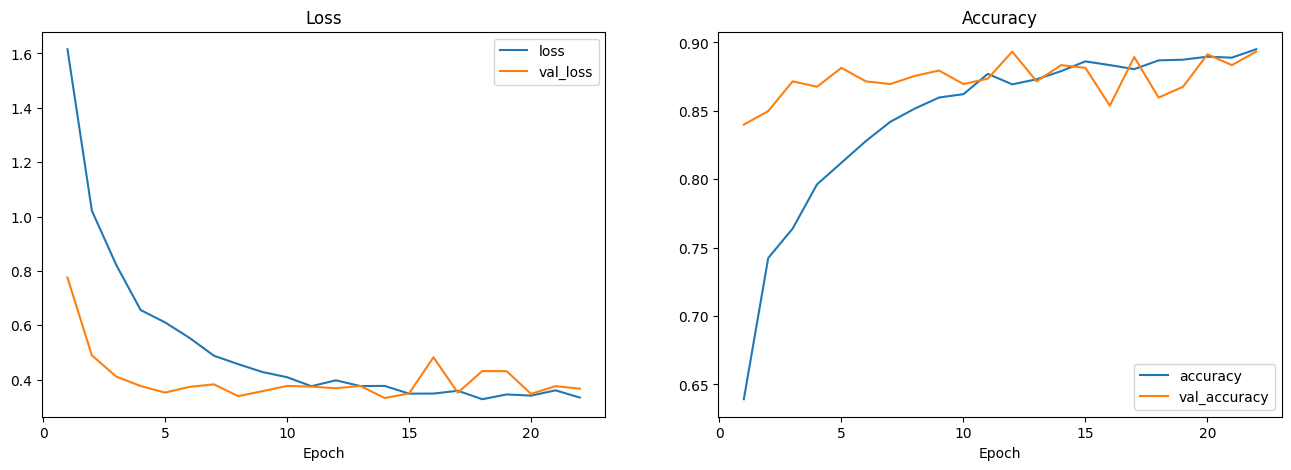

In [39]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10)])
epoch = len(history.history['loss'])

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),history.history['loss'],label='loss')
ax[0].plot(range(1,epoch+1),history.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')

ax[1].plot(range(1,epoch+1),history.history['accuracy'],label='accuracy')
ax[1].plot(range(1,epoch+1),history.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')


plt.show()

Berdasarkan hasil grafik diatas, kita dapat mengetahui bahwa ledakan gradien lebih terminimalisir yang menjadikan salah satu tujuan improvement terpenuhi.

### Melakukan prediksi pada train.

In [40]:
# Make predictions
y_train_pred = model.predict(X_train)
y_train_pred_class = np.argmax(y_train_pred,axis=1)
y_train_classes = np.argmax(y_train, axis=1)

print("Predicted Labels :", y_train_pred_class)
print("Actual Classes :", y_train_classes)

127/127 [==============================] - 2s 19ms/step
Predicted Labels : [2 2 2 ... 6 6 6]
Actual Classes : [2 2 2 ... 6 6 6]


### Melakukan predict pada data validation

In [41]:
y_pred = model.predict(X_val)
y_val_pred_classes = np.argmax(y_pred, axis=1)
y_val_classes = np.argmax(y_val, axis=1)

print("Predicted labels:", y_val_pred_classes)
print("Actual labels:", y_val_classes)

16/16 [==============================] - 0s 18ms/step
Predicted labels: [4 2 2 2 2 2 2 2 0 2 2 2 2 2 2 0 2 3 2 3 2 0 2 2 2 2 2 2 2 2 2 2 0 3 2 3 2
 2 2 2 2 2 2 2 4 2 2 2 2 2 2 2 2 3 1 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 6 2
 2 2 2 0 0 2 0 0 0 2 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 2 6 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 3 1 1 3 5 2 3 3 1 6 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 6 3 3 3 3 3 3 3
 3 3 3 3 4 3 3 3 3 3 4 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 5 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 4 4 4 4 4 4 4 4 4 5 6 4 4 4 5 4 4
 4 4 4 4 3 4 4 3 5 4 4 4 3 4 4 4 4 4 5 4 4 4 5 5 5 5 5 5 5 4 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 6 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5

### Melakukan prediksi pada X_test

In [42]:
y_pred = model.predict(X_test)
y_test_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

print("Predicted labels:", y_test_pred_classes)
print("Actual labels:", y_test_classes)

16/16 [==============================] - 1s 91ms/step
Predicted labels: [4 2 3 2 0 2 2 2 2 3 0 2 2 2 2 2 2 2 2 2 2 0 2 2 2 5 4 2 2 2 2 2 2 2 6 2 2
 2 2 0 2 2 2 0 2 2 4 0 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0 2 2 2 2 2 2
 2 2 0 5 3 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 3 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 3 1 4 1 1 1 1 1 1 1 1 1 3 3 3 3 3 0 3 5 3 3 3 3 3 3 3 3 3 3 3 3 3 5 3 3 3
 3 3 3 3 3 3 3 3 0 3 3 3 3 5 3 3 3 4 3 3 3 6 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 4 4 4 4 5 4 4 4 4 4 6 4 4 4 4 4 5 5
 4 6 5 4 4 4 4 5 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 4 4 4 4 4 4 4 5 3 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 2 5 5 5 5 5 5 5 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 4 5

### Melakukan perbandingan akurasi pada setiap data train, test dan val

In [43]:
accuracy_train = accuracy_score(y_train_classes,y_train_pred_class)
accuracy = accuracy_score(y_val_classes, y_val_pred_classes)
accuracy_test = accuracy_score(y_test_classes,y_test_pred_classes)
print("Accuracy Train: ", accuracy_train)
print("Accuracy Val:", accuracy)
print("Accuracy Test:", accuracy_test)

Accuracy Train:  0.972585823660163
Accuracy Val: 0.8932806324110671
Accuracy Test: 0.8939096267190569


Berdasarkan hasil akurasi diatas, kita dapat mengetahui bahwa model masih overfit namun sekarang memiliki selisih yang lebih kecil yaitu 8%.

In [44]:
print("classification report pada train")
print(classification_report(y_train_classes,y_train_pred_class))
print("classification report pada val")
print(classification_report(y_val_classes, y_val_pred_classes))
print("classification report pada test")
print(classification_report(y_test_classes,y_test_pred_classes))

classification report pada train
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       607
           1       1.00      1.00      1.00       639
           2       0.98      0.90      0.94       631
           3       0.98      0.98      0.98       636
           4       0.98      0.98      0.98       618
           5       0.98      0.99      0.98       619
           6       0.98      0.98      0.98       299

    accuracy                           0.97      4049
   macro avg       0.97      0.97      0.97      4049
weighted avg       0.97      0.97      0.97      4049

classification report pada val
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        76
           1       0.96      0.96      0.96        80
           2       0.87      0.78      0.83        79
           3       0.85      0.89      0.87        80
           4       0.91      0.87      0.89        77
           5  

# 8. Model Saving

Model saving telah dilakukan sebelumnya yaitu saat model training. hal tersebut saya lakukan supaya tidak ada perubahan setiap kali run ulang. karena saya lakukan save dan saya load lagi untuk melakukan evaluasi.

# 9. Pengambilan Kesimpulan


**Kesimpulan yang dapat diambil dari notebook ini adalah :**
1. Klasifikasi menggunakan Artificial Neural Network ini digunakan untuk  mengklasifikasikan data gambar suatu kendaaran menjadi beberapa kategori seperti mobil, motor, kereta, bajaj, kapal, sepeda, dan pesawat. Model ini diharapkan dapat digunakan untuk optimasi rute pengiriman sangat penting bagi perusahaan e-commerce untuk mengirimkan produk secara efisien dan hemat biaya kepada pelanggan. Integrasi model klasifikasi gambar ke dalam sistem optimasi rute dapat meningkatkan efisiensi pengiriman secara signifikan. Dengan mengidentifikasi jenis kendaraan, sistem dapat memilih rute yang paling sesuai, menyesuaikan secara dinamis dengan kondisi lalu lintas, memperkirakan waktu pengiriman, dan mengalokasikan sumber daya secara lebih baik. Manfaat dari pendekatan ini termasuk pengiriman yang lebih cepat, biaya bahan bakar yang lebih rendah, alokasi sumber daya yang lebih baik, dan pengambilan keputusan berbasis data. Model klasifikasi gambar memainkan peran yang sangat penting dalam proses ini, memungkinkan sistem untuk membuat keputusan yang lebih baik, meningkatkan efisiensi, dan memberikan layanan yang lebih baik kepada pelanggan

2. Kelebihan model adalah :
- Model memiliki akurasi yang tinggi yaitu 89% pada data test.
- Dapat membantu optimasi rute pengiriman supaya menjadi lebih efisien.

3. Kelemahan model adalah :
- Model masih overfitting pada data train, hal tersebut dapat dilihat dari selisih train dan val maupun test nya memiliki selisih sebesar 8%.
- Model melakukan prediksi dengan waktu yang cukup lama, dapat dilihat dari melakukan prediksi di train da validation sebelum dan sesudah improved. Sebelum improved prediksi dibawah 30 detik sedangkan setelah improved prediksi diatas 40 detik.

4. Improved selanjutnya :
- Memaksimalkan proses feature engineering dengan mengganti parameter ataupun menambah proses.
- Memaksimalkan penggunaan hyperparameter pada model.

